In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

Approach - A decision tree can be built with target variable 'Sale' (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [2]:
df = pd.read_csv('Company_Data.csv')

In [3]:
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

### Data Exploration

In [4]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
df.shape

(400, 11)

In [6]:
df.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
df["Sales"].unique()

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

In [9]:
df[df.duplicated()].shape


(0, 11)

In [10]:
df[df.duplicated()]


Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []

<AxesSubplot:>

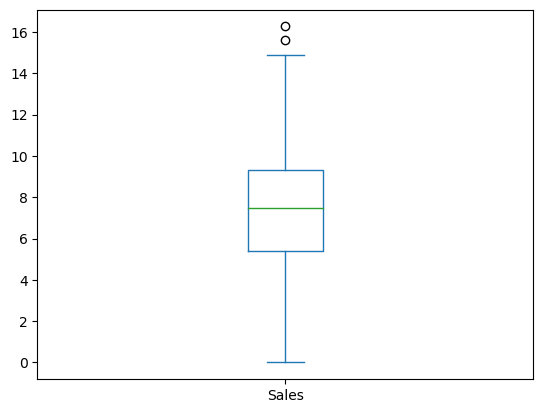

In [11]:
df["Sales"].plot(kind='box')

There are two outliers but as we are constructing the categorical data of Sales so we can ignore that

#### As instructed the "Sales" values should be categorical, to do so we have to see the destribution of sales

<AxesSubplot:>

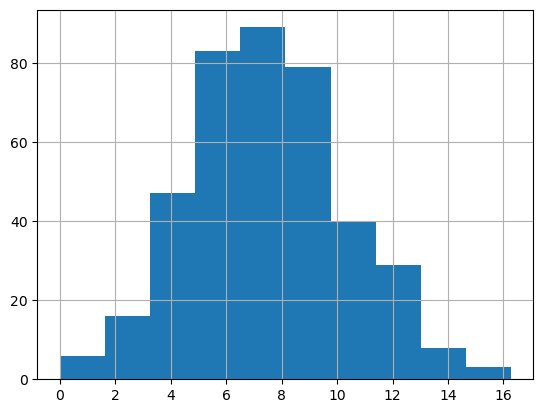

In [12]:
df['Sales'].hist()

As the Sales distribution is not skewed and it is normal distribution we can take mean or median as a threshold to make two or three categories 'Low', 'Medium' and 'High' Sales

and For three categories lets divide the Sales values with Quartiles , less than first quartile as 'Low' , between Second Quartile as 'Medium and above Third Quartile as 'High'


In [13]:
df['Sales'].max()

16.27

In [14]:
16.27/3

5.423333333333333

In [15]:
5.423333333 * 2

10.846666666

In [16]:
5.423333333 * 3

16.269999999

In [17]:
df1 = df.copy()
bins = [0, 5.39, 10.00, 17]
labels = ['Low', 'Medium', 'High']

df1['SCate'] = pd.cut(df['Sales'], bins=bins, labels=labels)

In [18]:
df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [19]:
df1

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US   SCate  
0           17   Yes  Yes  Medium  
1           10   Yes  Yes    High  
2           12   Yes  Yes    High  
3           14   Yes  Yes  Medium  
4           13   Yes   No     Low  
..         ...   ...  ...     ...  
395         14   Yes  Yes    High  
396         11    No  Yes  Medium  
397         18   Yes  Yes  Medium  
398         12   Yes  Yes  Medium  
399         16   Yes  Yes  Medium  

[400 rows x 12 columns]

Created a column SCate which will be our own made category about the Sales impression we are getting

In [20]:
df1['SCate'].value_counts()

Medium    222
Low        99
High       78
Name: SCate, dtype: int64

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
 11  SCate        399 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [22]:
categorical_features = df1.describe(include=["object",'category']).columns
categorical_features

numerical_features = df1.describe(include=["int64","float64"]).columns
numerical_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

## Data Visualization
#### As our dataframe to work on is final, lets visualize the data

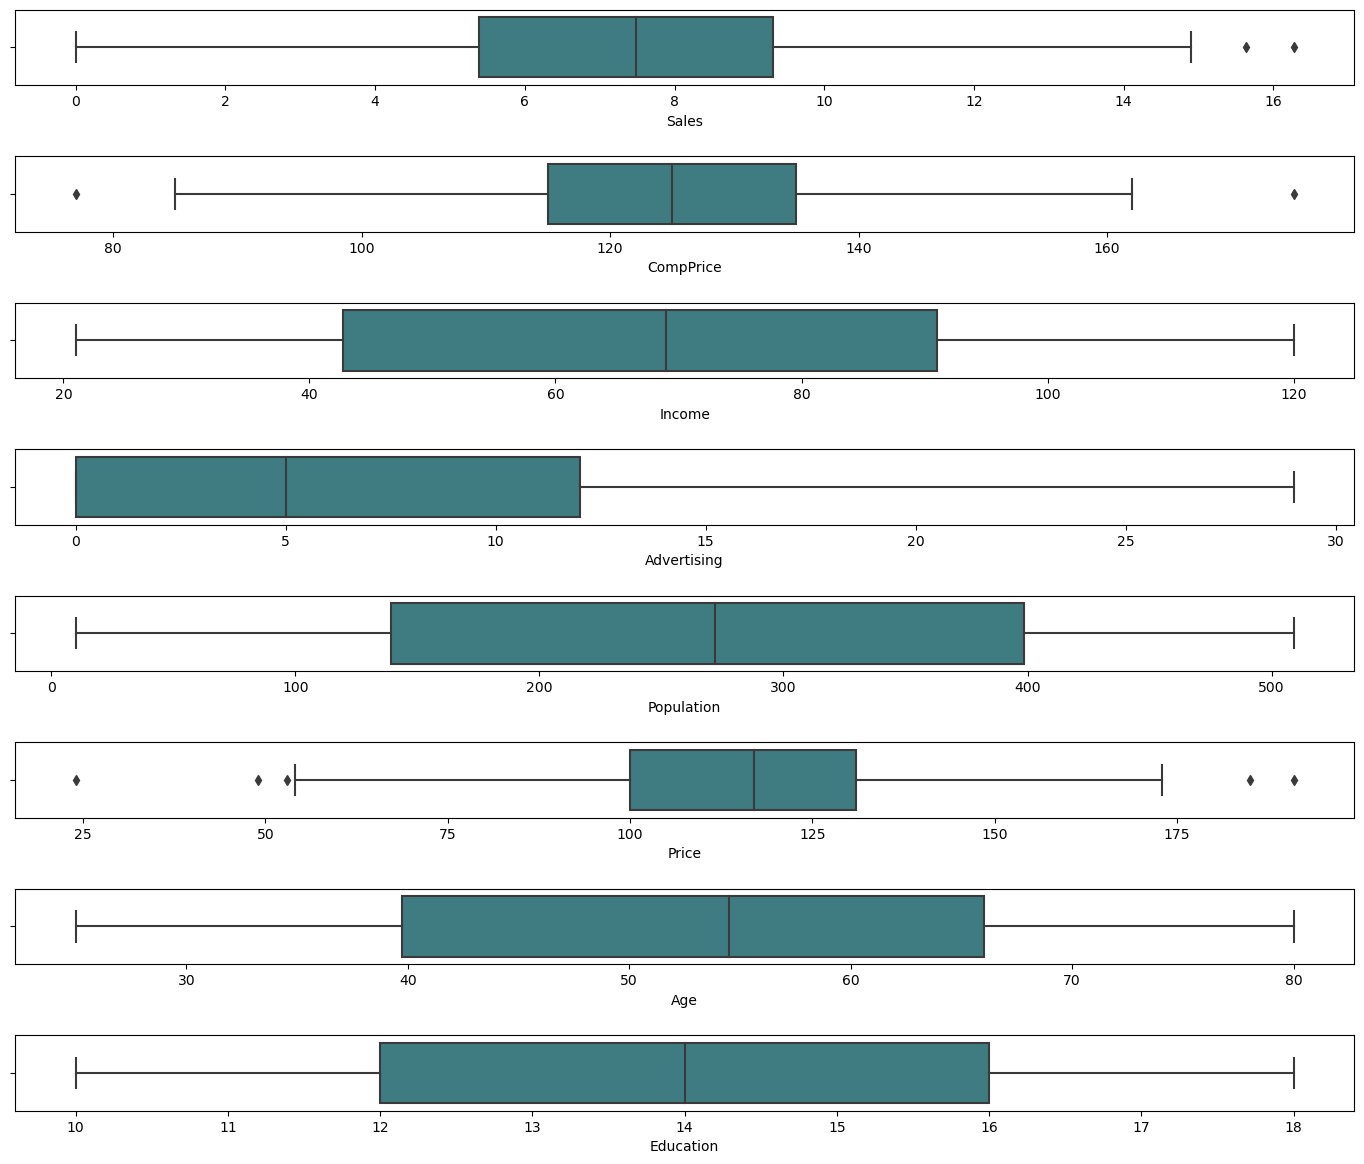

In [23]:
ot=df.copy() 
fig, axes=plt.subplots(8,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='Sales',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='CompPrice',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Income',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Advertising',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Population',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Price',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Age',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Education',data=ot,palette='crest',ax=axes[7])
plt.tight_layout(pad=2.0)

#### Lets see pairplot

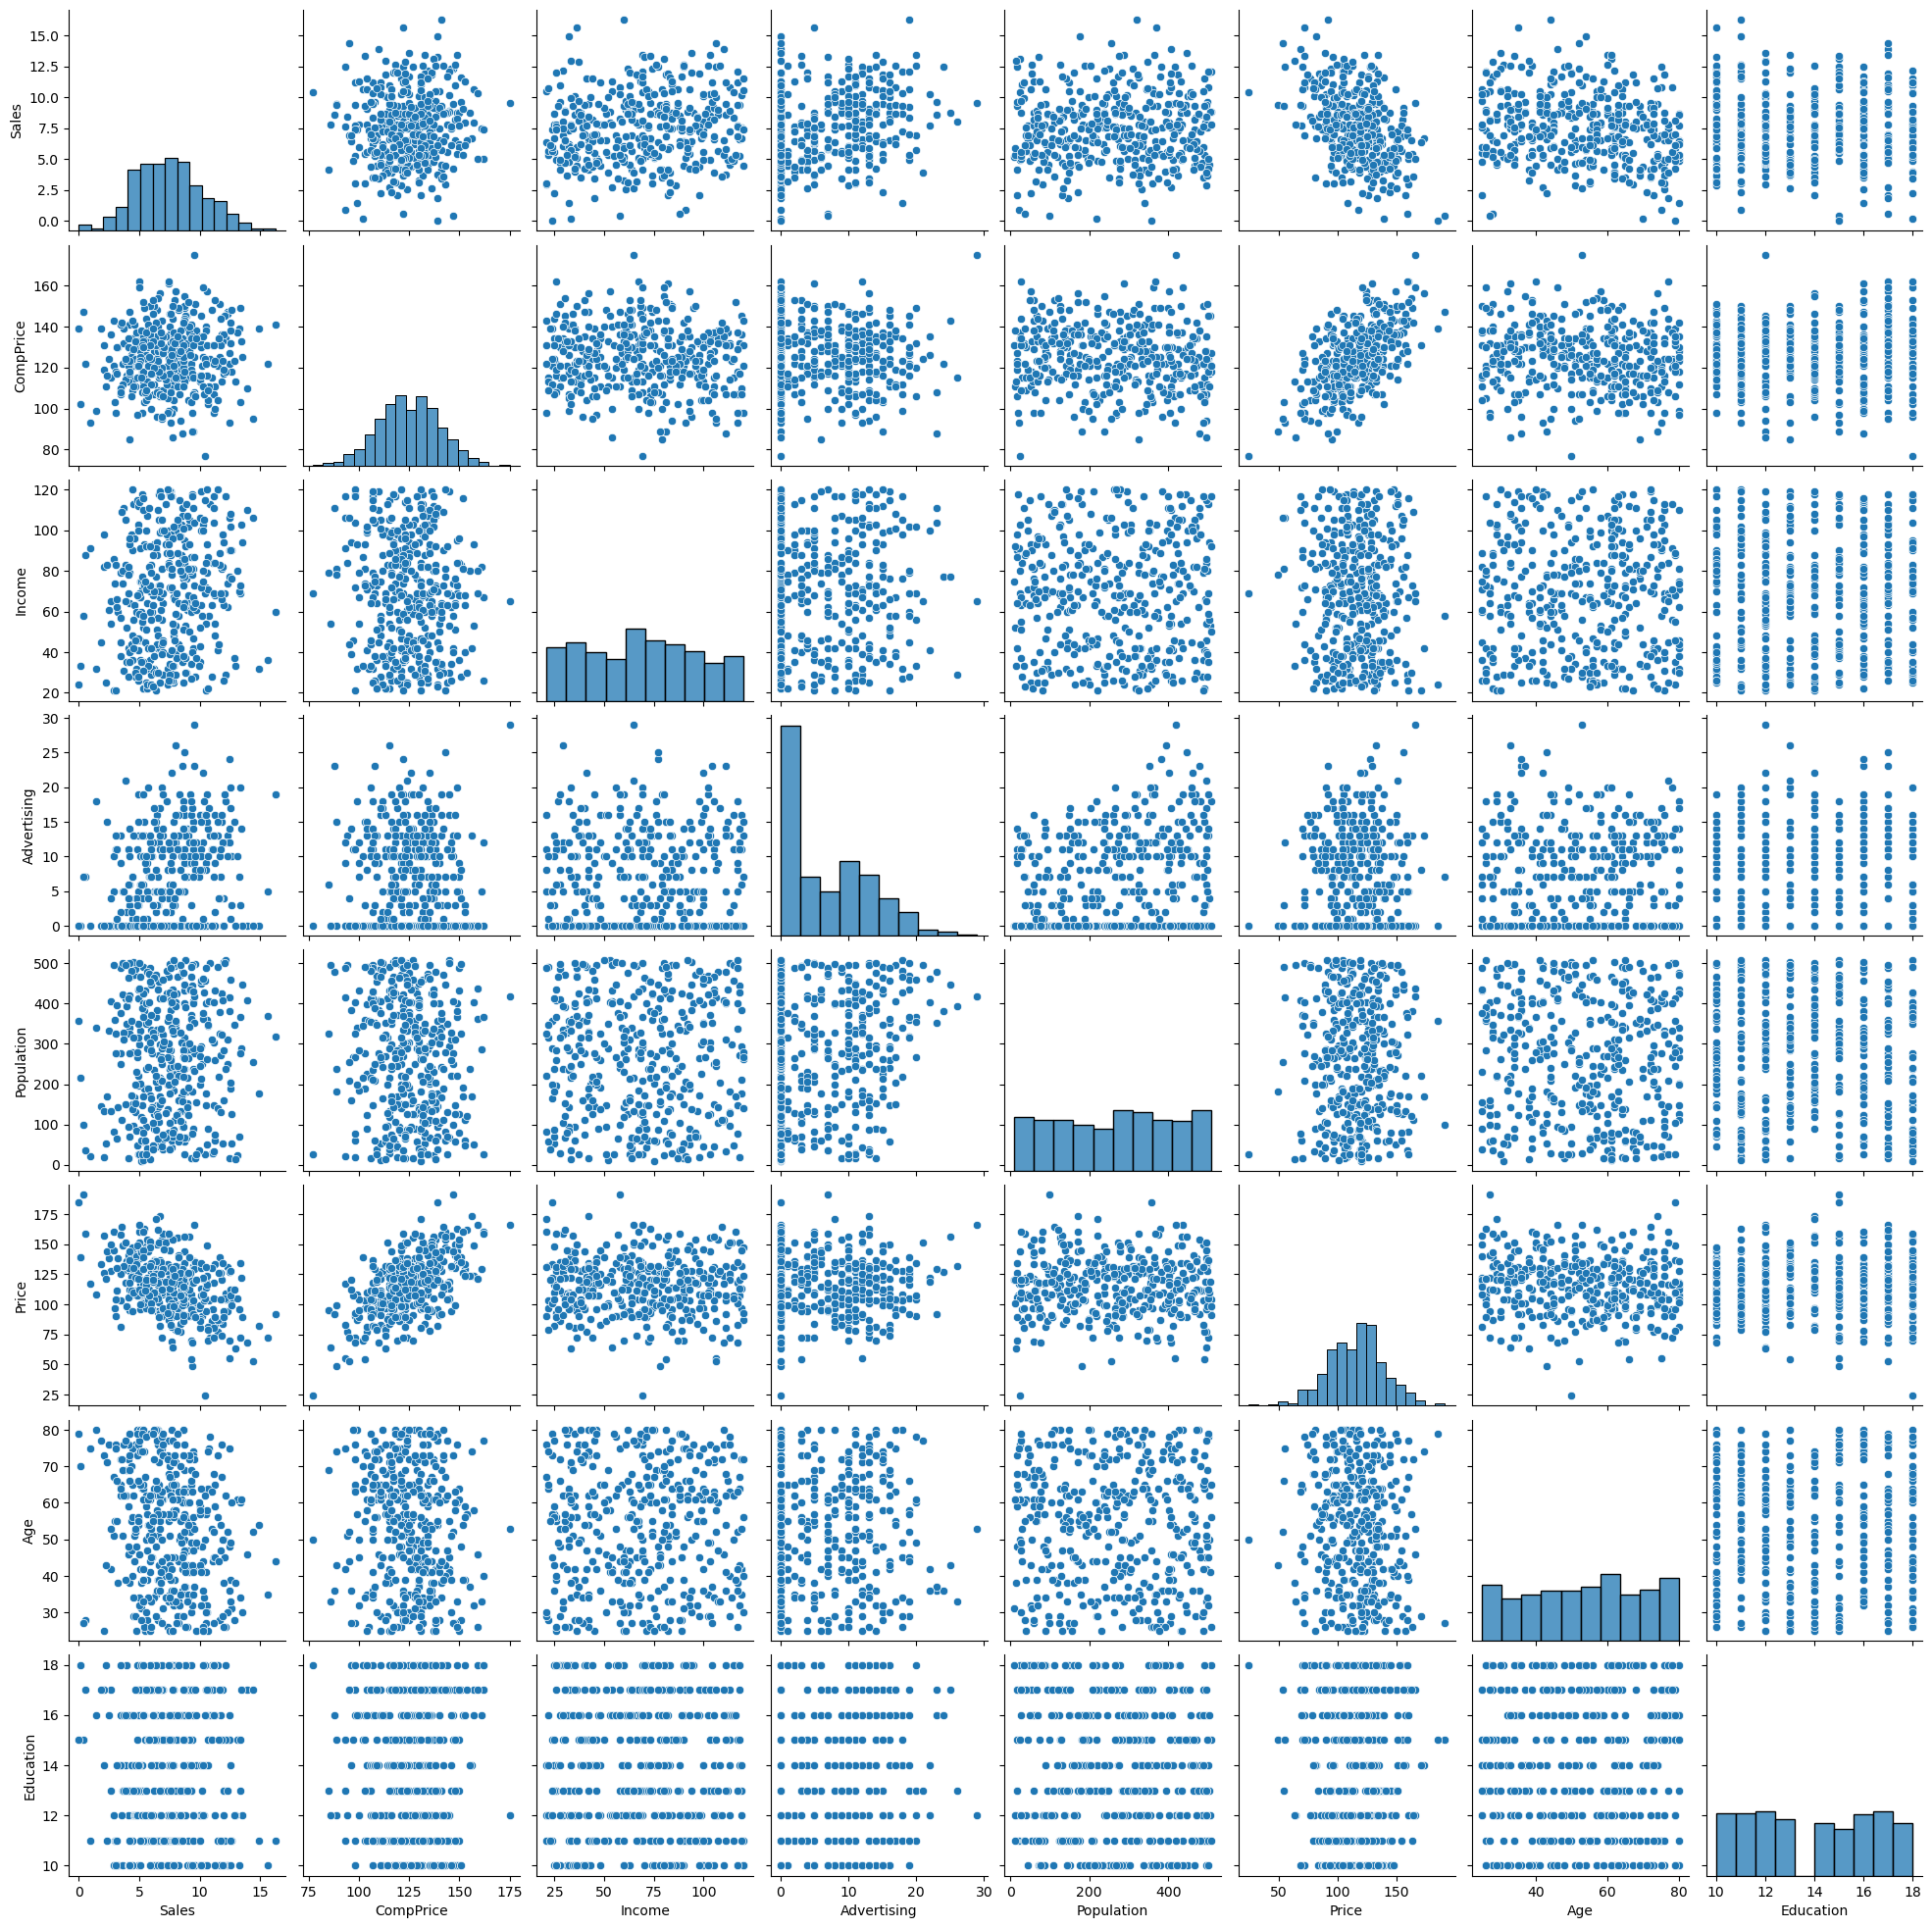

In [24]:
sns.pairplot(df1, palette='coolwarm')

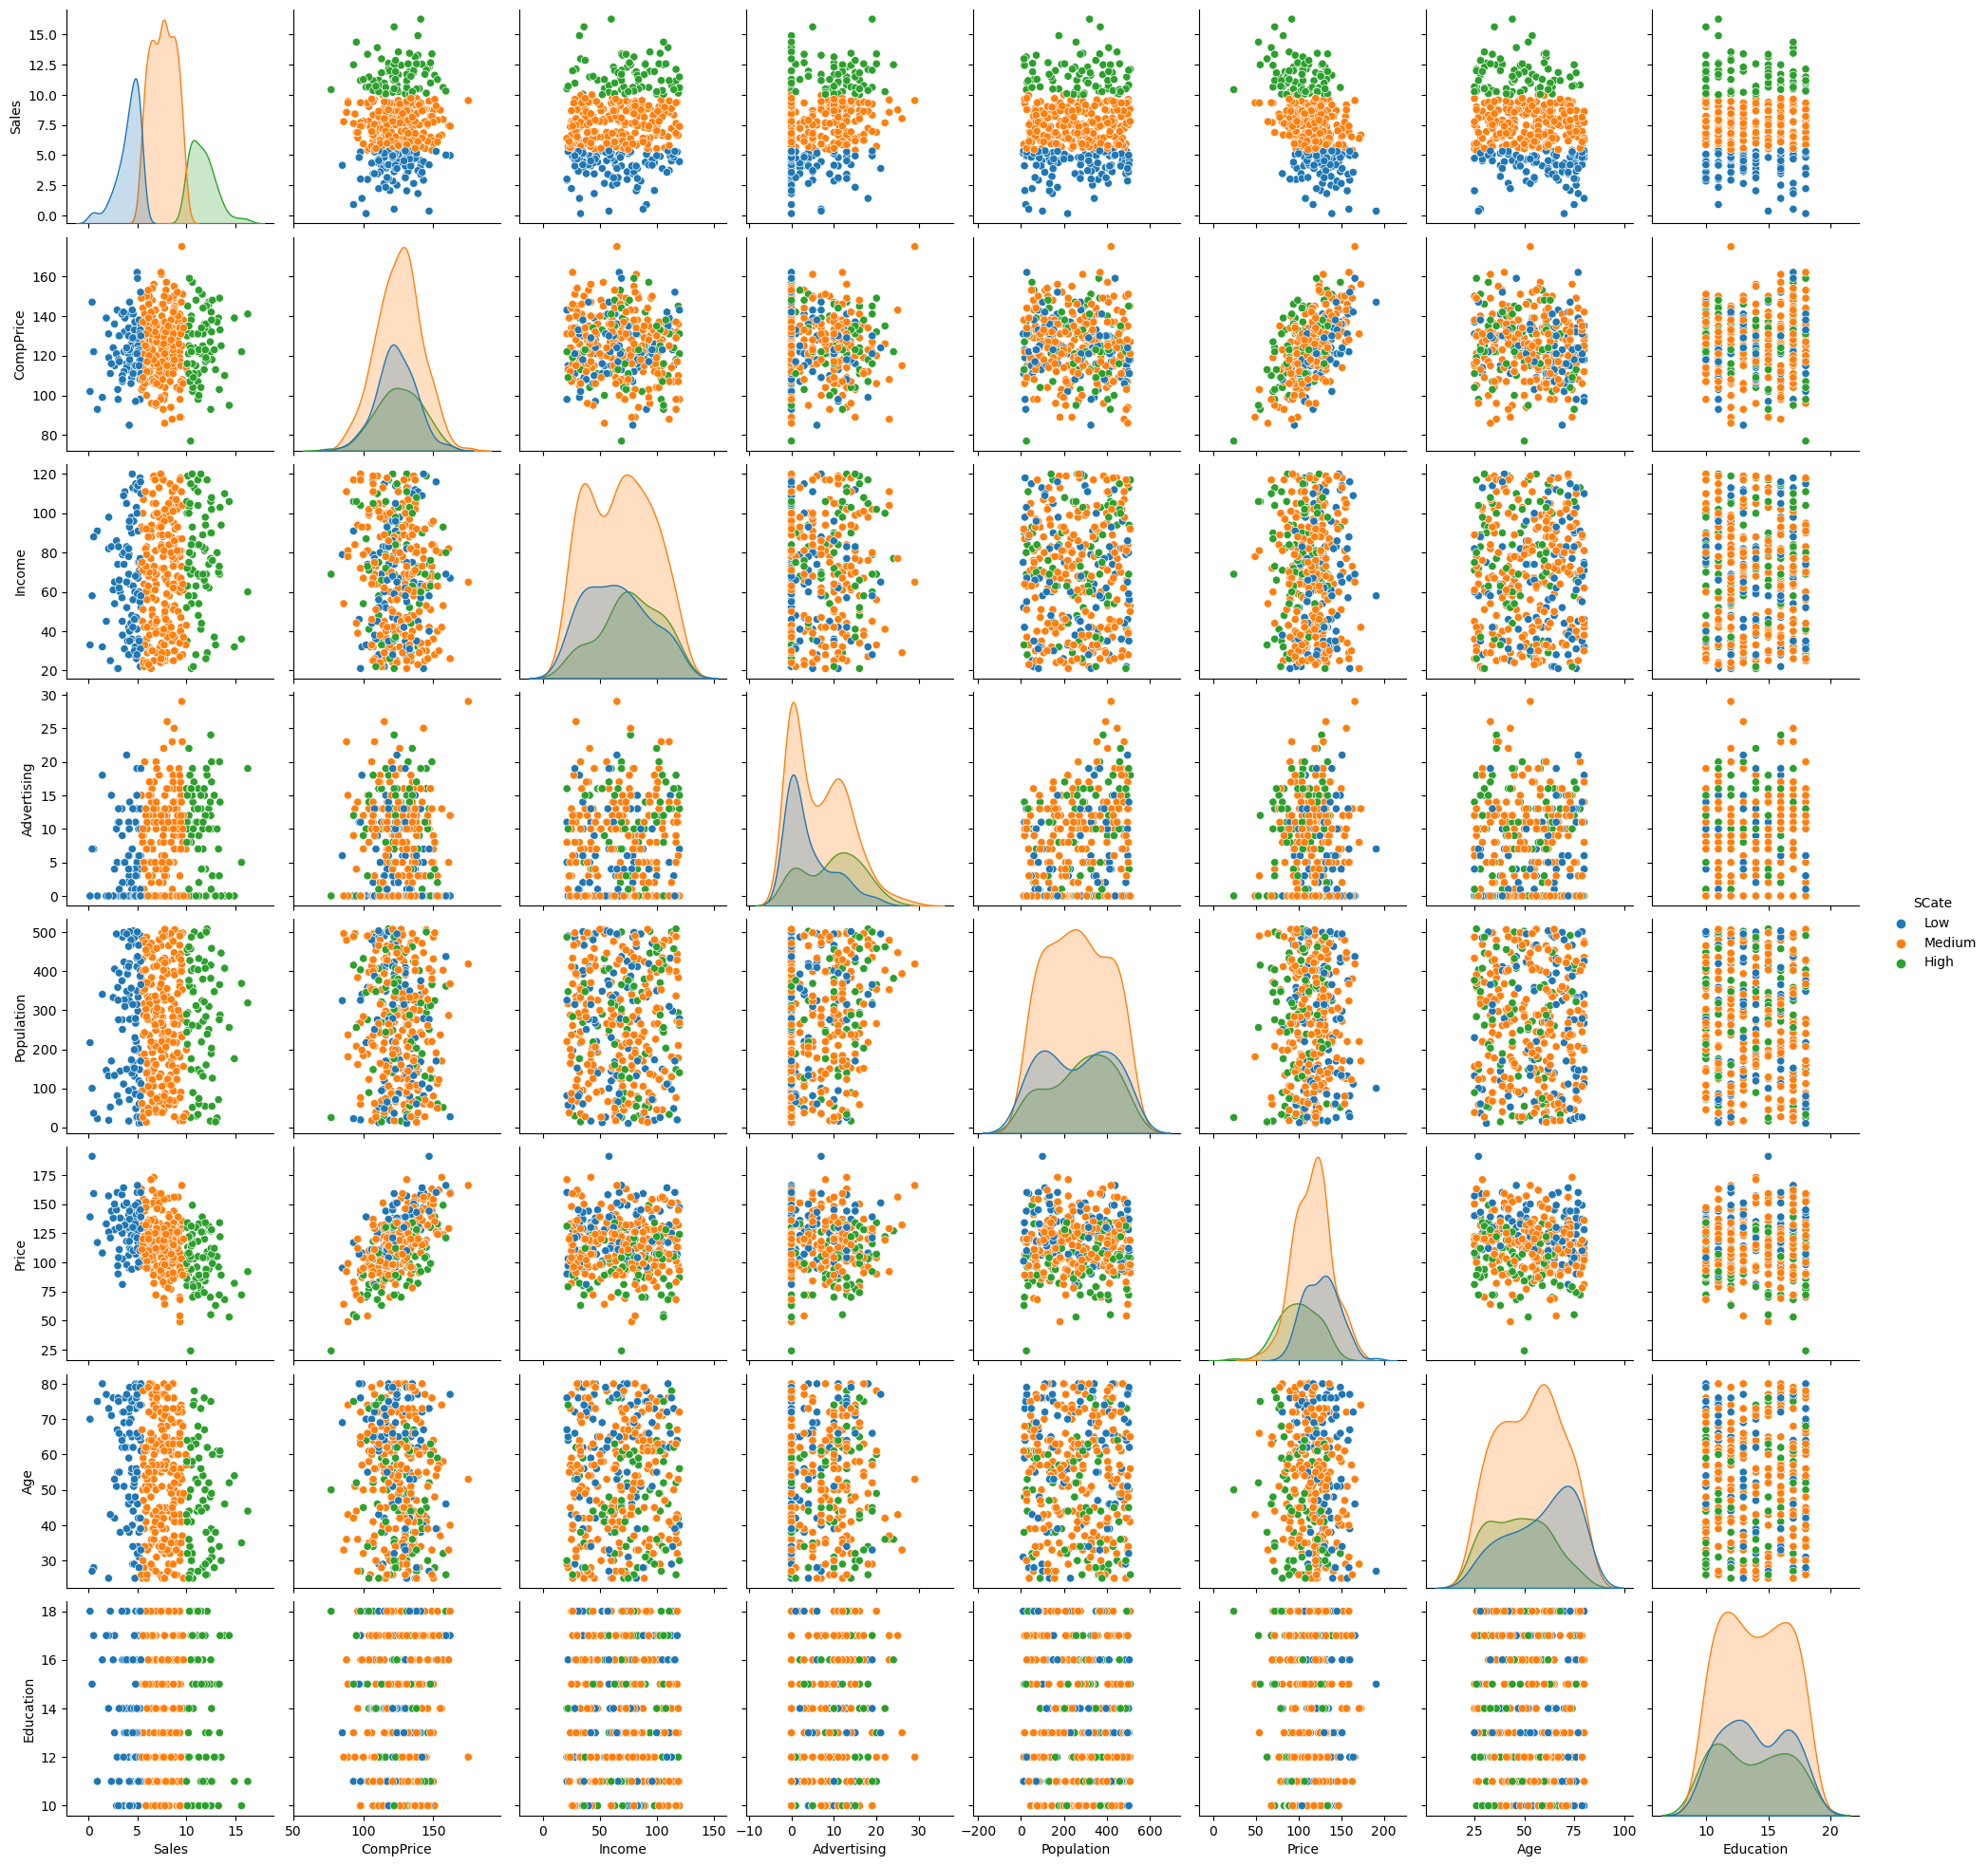

In [25]:
sns.pairplot(df1, hue='SCate')

<AxesSubplot:>

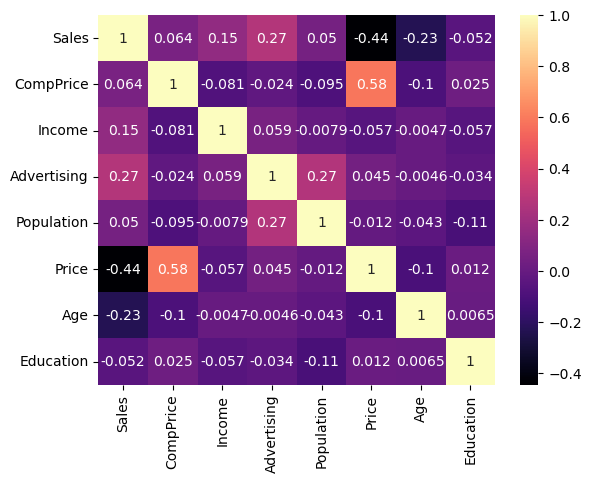

In [26]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='magma')

Text(0.5, 1.0, 'SCate Value Counts (Pie Chart)')

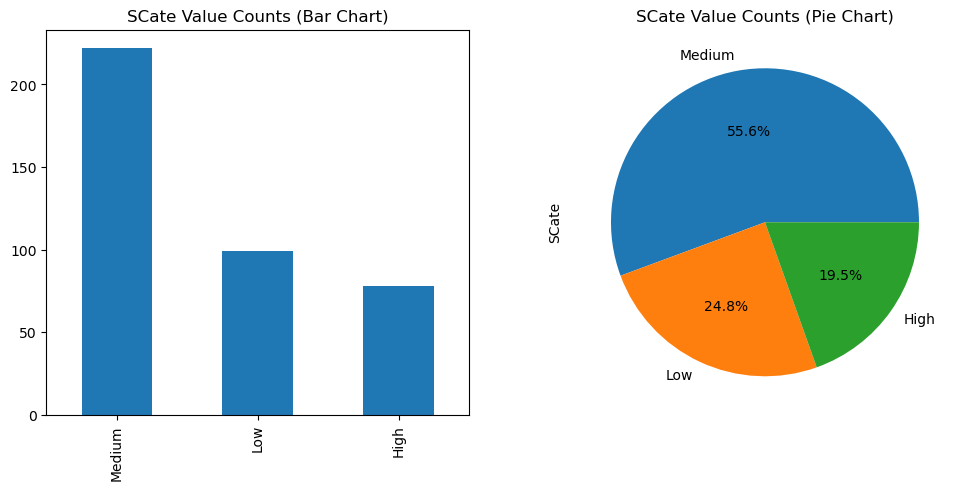

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df1['SCate'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('SCate Value Counts (Bar Chart)')

df1['SCate'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('SCate Value Counts (Pie Chart)')

### Data Preprocessing

In [28]:
df.drop("Sales",axis=1)

CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0          138      73           11         276    120       Bad   42   
1          111      48           16         260     83      Good   65   
2          113      35           10         269     80    Medium   59   
3          117     100            4         466     97    Medium   55   
4          141      64            3         340    128       Bad   38   
..         ...     ...          ...         ...    ...       ...  ...   
395        138     108           17         203    128      Good   33   
396        139      23            3          37    120    Medium   55   
397        162      26           12         368    159    Medium   40   
398        100      79            7         284     95       Bad   50   
399        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 10 columns]

In [29]:
df = pd.get_dummies(df)

#### applied encoding 

In [30]:
df.head()

Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0   9.50        138      73           11         276    120   42         17   
1  11.22        111      48           16         260     83   65         10   
2  10.06        113      35           10         269     80   59         12   
3   7.40        117     100            4         466     97   55         14   
4   4.15        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1  
3      0       1  
4      1       0

In [31]:
df1.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US   SCate  
0         17   Yes  Yes  Medium  
1         10   Yes  Yes    High  
2         12   Yes  Yes    High  
3         14   Yes  Yes  Medium  
4         13   Yes   No     Low

In [32]:
df1 = df1.drop("Sales",axis=1)

In [33]:
df1.head(2)

CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0        138      73           11         276    120       Bad   42   
1        111      48           16         260     83      Good   65   

   Education Urban   US   SCate  
0         17   Yes  Yes  Medium  
1         10   Yes  Yes    High

In [34]:
df1 = df1.rename(columns={'SCate': 'Sales'})
df1.head(3)

CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0        138      73           11         276    120       Bad   42   
1        111      48           16         260     83      Good   65   
2        113      35           10         269     80    Medium   59   

   Education Urban   US   Sales  
0         17   Yes  Yes  Medium  
1         10   Yes  Yes    High  
2         12   Yes  Yes    High

In [35]:
df.head(3)

Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0   9.50        138      73           11         276    120   42         17   
1  11.22        111      48           16         260     83   65         10   
2  10.06        113      35           10         269     80   59         12   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1

In [36]:
df = df.drop("Sales",axis=1)

In [37]:
df.head(3)

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1

In [38]:
df['Sales'] = df1.Sales
df.head(3)

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   

   US_No  US_Yes   Sales  
0      0       1  Medium  
1      0       1    High  
2      0       1    High

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sales']=le.fit_transform(df['Sales'])

#### we used LabelEncoder because it was our Target column on which we were applying it

In [40]:
df

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0                1               0                 0         0          1   
1                0               1                 0         0          1   
2                0               0                 1         0          1   
3                0               0                 1         0          1   
4                1               0                 0         0          1   
..             ...             ...               ...       ...        ...   
395              0               1                 0         0          1   
396              0               0                 1         1          0   
397              0               0                 1         0          1   
398              1               0                 0         0          1   
399              0               1                 0         0          1   

     US_No  US_Yes  Sales  
0        0       1      2  
1        0       1      0  
2        0       1      0  
3        0       1      2  
4        1       0      1  
..     ...     ...    ...  
395      0       1      0  
396      0       1      2  
397      0       1      2  
398      0       1      2  
399      0       1      2  

[400 rows x 15 columns]

In [41]:
X = df.iloc[:, :-1]
y=  df['Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [42]:
X_train.shape

(320, 14)

In [43]:
y_train.shape

(320,)

In [44]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
pred = model.predict(X_train)


In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(pred, y_train)

1.0

In [47]:
pred1 = model.predict(X_test)
accuracy_score(pred1, y_test)

0.6

In [48]:
model.feature_importances_

array([0.14720042, 0.09390334, 0.15131312, 0.07693212, 0.27243471,
       0.08786984, 0.01345307, 0.        , 0.07618549, 0.04970177,
       0.        , 0.        , 0.03100611, 0.        ])

In [49]:
final = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': model.feature_importances_})

In [50]:
final.sort_values('importance', ascending=False)

feature  importance
4              Price    0.272435
2        Advertising    0.151313
0          CompPrice    0.147200
1             Income    0.093903
5                Age    0.087870
3         Population    0.076932
8     ShelveLoc_Good    0.076185
9   ShelveLoc_Medium    0.049702
12             US_No    0.031006
6          Education    0.013453
7      ShelveLoc_Bad    0.000000
10          Urban_No    0.000000
11         Urban_Yes    0.000000
13            US_Yes    0.000000

### As seen in the above table Price is most important feature


In [ ]:
!pip install graphviz
import graphviz

feature_names = X.columns

class_names = [str(s) for s in y.unique()]

dot_data = export_graphviz(model, out_file=None,
                           feature_names=feature_names,
                           class_names=class_names,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree-1")  
graph.view("decision_tree-1")   

In [54]:
from IPython.display import Image
image_path = 'decision_tree-1.png'
Image(filename=image_path)
